In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy import stats
import seaborn as sns

In [2]:
daily_data = pd.read_csv("daily_data.csv")
daily_data.set_index("date", inplace = True)

X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")

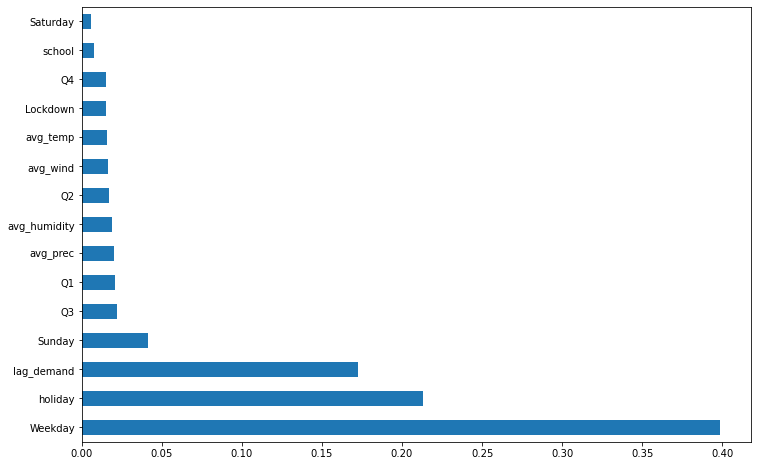

In [3]:
from xgboost import XGBRegressor
selection = XGBRegressor()
selection.fit(X_train, y_train)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [4]:
import numpy as np
from sklearn.metrics import r2_score

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def adj_r2(actual, pred, i):
    return 1 - ((1-r2_score(actual,pred))*(len(actual)-1)/(len(actual)-i-1))

### Multiple Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()




for i in range(6,16):
    Xtrain_best = X_train[feat_importances.nlargest(i).index]
    LR.fit(Xtrain_best,y_train)
    Xtest_best = X_test[feat_importances.nlargest(i).index]
    
    y_pred= LR.predict(Xtest_best)

    y_pred_train = LR.predict(Xtrain_best)
    
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)



    from sklearn.metrics import r2_score
    print(i,"features: ")
    

    print("RMSE for test set is: ",(mse**(1/2)))
    print("RMSE for train set is: ", (mse_train**(1/2)))
    
    r2_adjtest = adj_r2(y_test, y_pred,i)
    r2_adjtrain = adj_r2(y_train, y_pred_train,i)
   
    print("Adjusted R2 score for test: ",r2_adjtest)
    print("Adjusted R2 score for training: ",r2_adjtrain)
    
    mape_test = mape(y_test, y_pred)
    mape_train = mape(y_train, y_pred_train)
    
   
    print("MAPE for test: ",mape_test)
    print("MAPE for training: ",mape_train)
    print(" ")
    

6 features: 
RMSE for test set is:  1334.4351663605491
RMSE for train set is:  1312.0005646205286
Adjusted R2 score for test:  0.6643299370362046
Adjusted R2 score for training:  0.6529088698451604
MAPE for test:  3.6706271369052024
MAPE for training:  3.588827756850176
 
7 features: 
RMSE for test set is:  1300.6882178212738
RMSE for train set is:  1262.77072168028
Adjusted R2 score for test:  0.6802773710576812
Adjusted R2 score for training:  0.6782653183819731
MAPE for test:  3.5669135829457974
MAPE for training:  3.468929233965264
 
8 features: 
RMSE for test set is:  1293.2716795275376
RMSE for train set is:  1219.8195938940894
Adjusted R2 score for test:  0.6831026204879393
Adjusted R2 score for training:  0.6995905070076327
MAPE for test:  3.5979526547380694
MAPE for training:  3.35274562816408
 
9 features: 
RMSE for test set is:  1292.3702441383755
RMSE for train set is:  1217.3576245624786
Adjusted R2 score for test:  0.6827307227733366
Adjusted R2 score for training:  0.700

In [7]:
#Best result with 12 features

### Final Multiple Linear Regression Model

In [9]:
Xtrain_best = X_train[feat_importances.nlargest(12).index]
LR.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(12).index]
    
y_pred= LR.predict(Xtest_best)


    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE for test set is: ",(mse**(1/2)))
  
r2_adjtest = adj_r2(y_test, y_pred,12)

   
print("Adjusted R2 score for test: ",r2_adjtest)

mape_test = mape(y_test, y_pred)

print("MAPE for test: ",mape_test)


RMSE for test set is:  1237.669039902547
Adjusted R2 score for test:  0.7067584745100715
MAPE for test:  3.444794421167773


<Figure size 1440x1440 with 0 Axes>

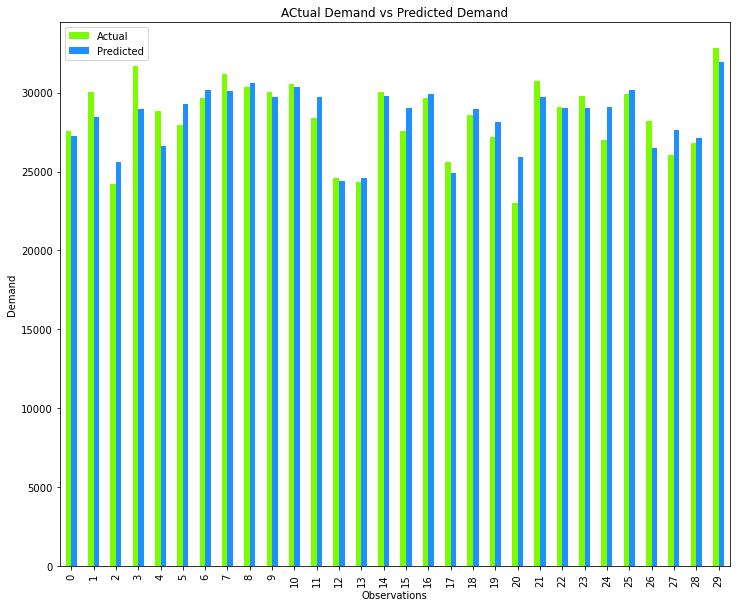

In [12]:

plt.figure(figsize= (20,20))
df = pd.concat([y_test, pd.DataFrame(y_pred)], axis = 1)
df.columns = {"Actual","Predicted"}

df.head(30).plot(kind='bar',figsize=(12,10),color = {"dodgerblue","lawngreen"})
plt.title("ACtual Demand vs Predicted Demand")
plt.xlabel("Observations")
plt.ylabel("Demand")
plt.show()
